In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [61]:
train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [62]:
train['prognosis'].value_counts()

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [64]:
test.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
test_id = test['id']
Id = pd.DataFrame(test_id, columns=['id'])

<AxesSubplot: >

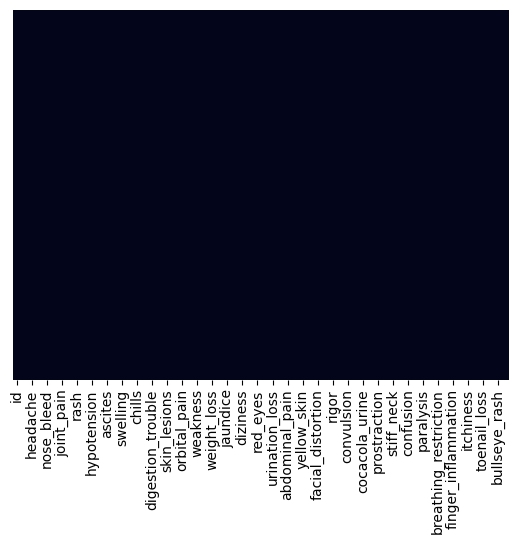

In [66]:
sns.heatmap(train.isnull(),yticklabels=False, cbar= False)

<AxesSubplot: >

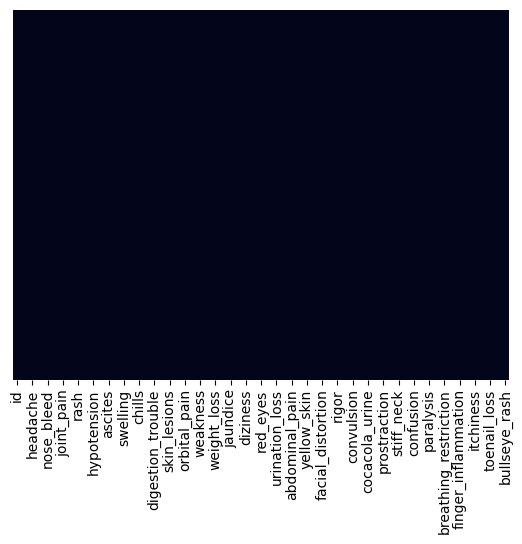

In [67]:
sns.heatmap(test.isnull(),yticklabels=False, cbar= False)

In [68]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [69]:
X_train = train.drop('prognosis', axis=1)
y_train = train['prognosis']
X_test = test

In [70]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
predictions = pd.DataFrame(tree.predict(X_test), columns = ['Predictions'])
predictions = pd.concat([Id, predictions], axis=1)

In [74]:
predictions.head()

,id,Predictions
0,707,Rift_Valley_fever
1,708,Dengue
2,709,West_Nile_fever
3,710,Japanese_encephalitis
4,711,West_Nile_fever


In [86]:
predictions['Predictions'].value_counts()

West_Nile_fever          43
Dengue                   32
Rift_Valley_fever        31
Japanese_encephalitis    31
Chikungunya              29
Plague                   26
Lyme_disease             24
Malaria                  23
Zika                     23
Tungiasis                21
Yellow_Fever             20
Name: Predictions, dtype: int64

In [88]:
predictions['Predictions'].nunique()

11

In [76]:
tree.score(X_train,y_train)*100

100.0

In [77]:
from sklearn.ensemble import RandomForestClassifier
Rand = RandomForestClassifier()
Rand.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
pred = pd.DataFrame(Rand.predict(X_test), columns = ['Predictions'])
Rand_pred = pd.concat([Id, pred], axis=1)
Rand_pred['Predictions'].value_counts()

West_Nile_fever          43
Chikungunya              41
Japanese_encephalitis    39
Lyme_disease             32
Malaria                  25
Yellow_Fever             25
Rift_Valley_fever        25
Tungiasis                25
Plague                   23
Zika                     13
Dengue                   12
Name: Predictions, dtype: int64

In [79]:
Rand.score(X_train,y_train)*100

100.0

In [80]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
predictions1 = pd.DataFrame(Log.predict(X_test), columns = ['Predictions'])
Log_pred = pd.concat([Id, predictions1], axis=1)
Log_pred['Predictions'].value_counts()

West_Nile_fever          41
Japanese_encephalitis    33
Chikungunya              32
Tungiasis                28
Dengue                   27
Lyme_disease             26
Malaria                  26
Rift_Valley_fever        25
Yellow_Fever             24
Plague                   23
Zika                     18
Name: Predictions, dtype: int64

In [84]:
Log.score(X_train, y_train)*100

53.32390381895332

In [108]:
from sklearn.neighbors import KNeighborsClassifier
Neighbors = KNeighborsClassifier(n_neighbors=11)
Neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [109]:
KNN_Predictions = pd.DataFrame(Neighbors.predict(X_test), columns=['Predictions'])
KNN_pred = pd.concat([Id, KNN_Predictions], axis=1)
KNN_pred['Predictions'].value_counts()

Chikungunya              88
Lyme_disease             38
Yellow_Fever             31
Tungiasis                31
Zika                     23
Malaria                  22
Japanese_encephalitis    21
Plague                   18
West_Nile_fever          14
Rift_Valley_fever        11
Dengue                    6
Name: Predictions, dtype: int64

In [110]:
Neighbors.score(X_train,y_train)*100

37.05799151343705

In [111]:
Rand_pred.to_csv('Rand Submission.csv')
predictions.to_csv('Tree Submission.csv')